## Problem Statement

A retail company wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month.
The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

## Variable	Definition

In [124]:
# User_ID	User ID
# Product_ID	Product ID
# Gender	Sex of User
# Age	Age in bins
# Occupation	Occupation (Masked)
# City_Category	Category of the City (A,B,C)
# Stay_In_Current_City_Years	Number of years stay in current city
# Marital_Status	Marital Status
# Product_Category_1	Product Category (Masked)
# Product_Category_2	Product may belongs to other category also (Masked)
# Product_Category_3	Product may belongs to other category also (Masked)
# Purchase	Purchase Amount (Target Variable)

## Importing Libraries and Loading data

In [125]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [126]:
data = pd.read_csv("https://raw.githubusercontent.com/nanthasnk/Black-Friday-Sales-Prediction/master/Data/BlackFridaySales.csv")

In [127]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [128]:
data.shape

(537577, 12)

In [129]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
User_ID                       537577 non-null int64
Product_ID                    537577 non-null object
Gender                        537577 non-null object
Age                           537577 non-null object
Occupation                    537577 non-null int64
City_Category                 537577 non-null object
Stay_In_Current_City_Years    537577 non-null object
Marital_Status                537577 non-null int64
Product_Category_1            537577 non-null int64
Product_Category_2            370591 non-null float64
Product_Category_3            164278 non-null float64
Purchase                      537577 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


`Age` should be treated as a numerical column

`City_Category` we can convert this to a numerical column and should look at the frequency of each city category.

`Gender` has two values and should be converted to binary values

`Product_Category_2` and `Product_Category_3` have null values

## Checking Null values

In [130]:
data.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64

## Null Value in percentage

In [131]:
data.isnull().sum()/data.shape[0]*100

User_ID                        0.000000
Product_ID                     0.000000
Gender                         0.000000
Age                            0.000000
Occupation                     0.000000
City_Category                  0.000000
Stay_In_Current_City_Years     0.000000
Marital_Status                 0.000000
Product_Category_1             0.000000
Product_Category_2            31.062713
Product_Category_3            69.441029
Purchase                       0.000000
dtype: float64

There are 31% null values in the `Product_Category_2` and 69% null values in the `Product_Category_3`

# Unique elements in each attributes

In [132]:
data.nunique()

User_ID                        5891
Product_ID                     3623
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               18
Product_Category_2               17
Product_Category_3               15
Purchase                      17959
dtype: int64

We can drop `User_ID` and `Product_ID` for model prediction as it has more unique values.

# EDA

## Target Variable Purchase

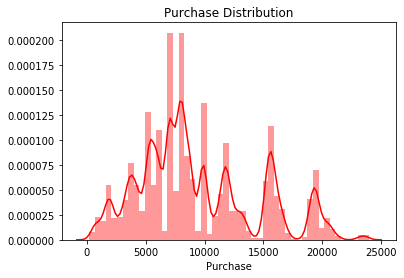

In [133]:
sns.distplot(data["Purchase"],color='r')
plt.title("Purchase Distribution")
plt.show()

We can observe that purchase amount is repeating for many customers.This may be because on Black Friday many are buying discounted products in large numbers and kind of follows a Gaussian Distribution.

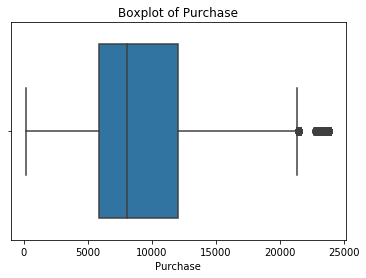

In [134]:
sns.boxplot(data["Purchase"])
plt.title("Boxplot of Purchase")
plt.show()

In [135]:
data["Purchase"].skew()

0.6242797316083074

In [136]:
data["Purchase"].kurtosis()

-0.34312137256836284

In [137]:
data["Purchase"].describe()

count    537577.000000
mean       9333.859853
std        4981.022133
min         185.000000
25%        5866.000000
50%        8062.000000
75%       12073.000000
max       23961.000000
Name: Purchase, dtype: float64

The purchase is right skewed and we can observe multiple peaks in the distribution we can do a log transformation for the purchase.

### Gender

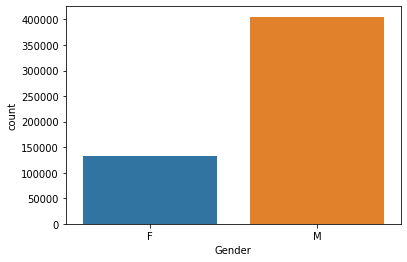

In [138]:
sns.countplot(data['Gender'])
plt.show()

In [139]:
data['Gender'].value_counts(normalize=True)*100

M    75.408732
F    24.591268
Name: Gender, dtype: float64

There are more males than females

In [140]:
data.groupby("Gender").mean()["Purchase"]

Gender
F    8809.761349
M    9504.771713
Name: Purchase, dtype: float64

On average the male gender spends more money on purchase contrary to female, and it is possible to also observe this trend by adding the total value of purchase.

### Marital Status

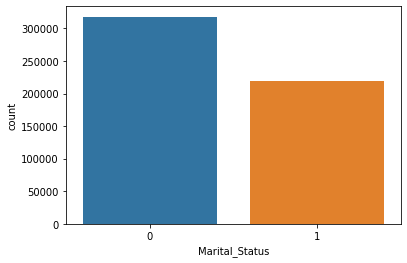

In [141]:
sns.countplot(data['Marital_Status'])
plt.show()

There are more unmarried people in the dataset who purchase more

In [142]:
data.groupby("Marital_Status").mean()["Purchase"]

Marital_Status
0    9333.325467
1    9334.632681
Name: Purchase, dtype: float64

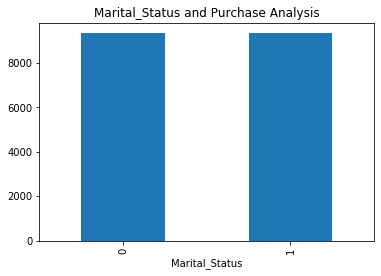

In [143]:
data.groupby("Marital_Status").mean()["Purchase"].plot(kind='bar')
plt.title("Marital_Status and Purchase Analysis")
plt.show()

This is interesting though unmarried people spend more on purchasing, the average purchase amount of married and unmarried people are the same.

### Occupation

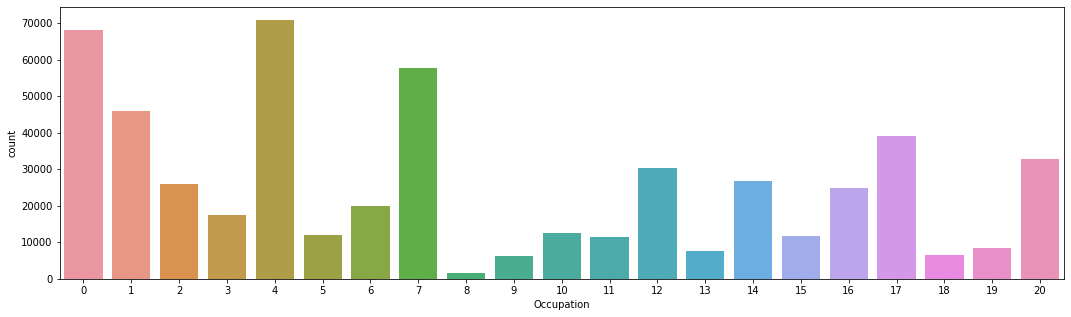

In [144]:
plt.figure(figsize=(18,5))
sns.countplot(data['Occupation'])
plt.show()

Occupation has at least 20 different values. Since we do not known to each occupation each number corresponds, is difficult to make any analysis. Furthermore, it seems we have no alternative but to use since there is no way to reduce this number

In [145]:
occup = pd.DataFrame(data.groupby("Occupation").mean()["Purchase"])
occup

,Purchase
Occupation,
0,9186.946726
1,9017.703095
2,9025.938982
3,9238.077277
4,9279.026742
5,9388.848978
6,9336.378620
7,9502.175276
8,9576.508530


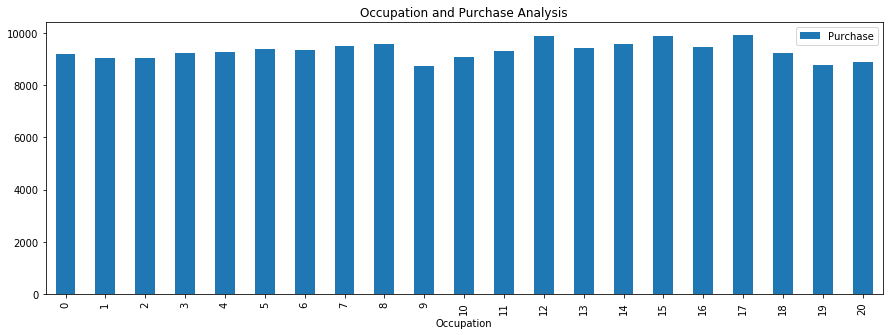

In [146]:
occup.plot(kind='bar',figsize=(15,5))
plt.title("Occupation and Purchase Analysis")
plt.show()

Although there are some occupations which have higher representations, it seems that the amount each user spends on average is more or less the same for all occupations. Of course, in the end, occupations with the highest representations will have the highest amounts of purchases.

### City_Category

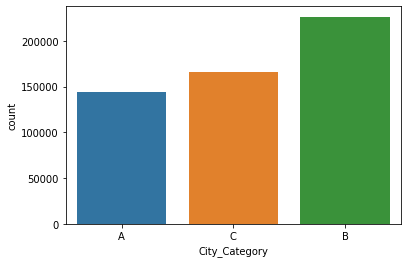

In [147]:
sns.countplot(data['City_Category'])
plt.show()

It is observed that city category B has made the most number of puchases.

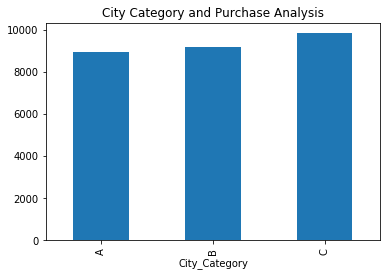

In [148]:
data.groupby("City_Category").mean()["Purchase"].plot(kind='bar')
plt.title("City Category and Purchase Analysis")
plt.show()

However, the city whose buyers spend the most is city type ‘C’.

### Stay_In_Current_City_Years

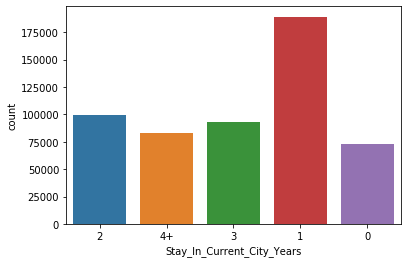

In [149]:
sns.countplot(data['Stay_In_Current_City_Years'])
plt.show()

It looks like the longest someone is living in that city the less prone they are to buy new things. Hence, if someone is new in town and needs a great number of new things for their house that they’ll take advantage of the low prices in Black Friday to purchase all the things needed.

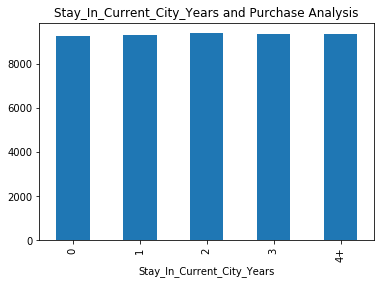

In [151]:
data.groupby("Stay_In_Current_City_Years").mean()["Purchase"].plot(kind='bar')
plt.title("Stay_In_Current_City_Years and Purchase Analysis")
plt.show()

We see the same pattern seen before which show that on average people tend to spend the same amount on purchases regardeless of their group. People who are new in city are responsible for the higher number of purchase, however looking at it individually they tend to spend the same amount independently of how many years the have lived in their current city.

### Age

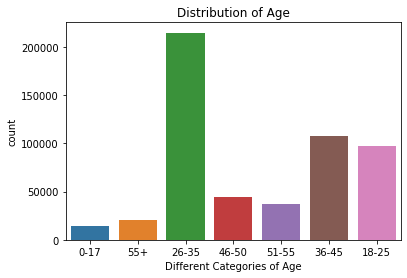

In [152]:
sns.countplot(data['Age'])
plt.title('Distribution of Age')
plt.xlabel('Different Categories of Age')
plt.show()

Age 26-35 Age group makes the most no of purchases in the age group.

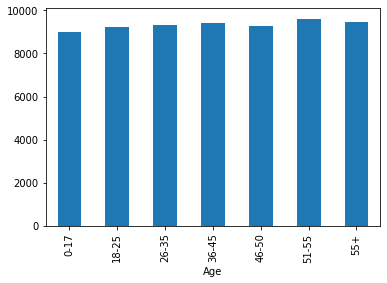

In [153]:
data.groupby("Age").mean()["Purchase"].plot(kind='bar')

Mean puchase rate between the age groups tends to be the same except that the 51-55 age group has a little higher average purchase amount

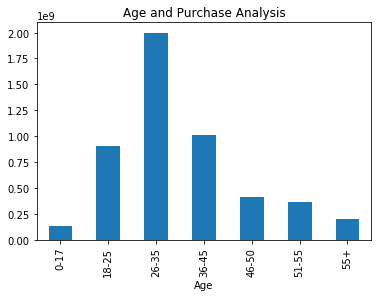

In [154]:
data.groupby("Age").sum()['Purchase'].plot(kind="bar")
plt.title("Age and Purchase Analysis")
plt.show()

Total amount spent in purchase is in accordance with the number of purchases made, distributed by age.

### Product_Category_1

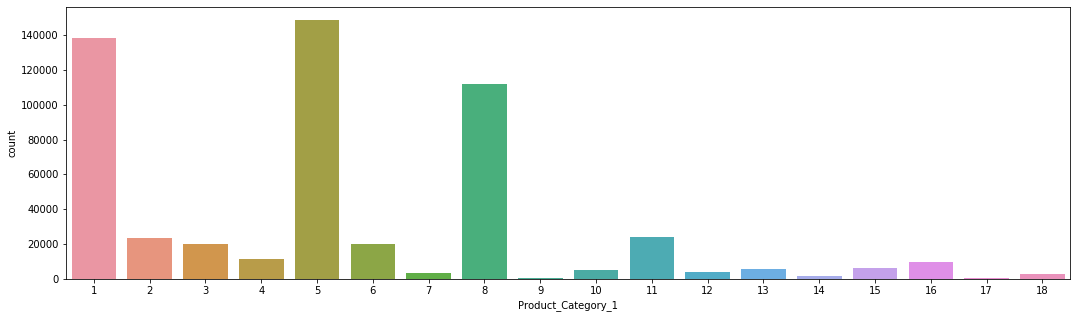

In [155]:
plt.figure(figsize=(18,5))
sns.countplot(data['Product_Category_1'])
plt.show()

It is clear that `Product_Category_1` numbers 1,5 and 8 stand out. Unfortunately we don't know which product each number represents as it is masked.

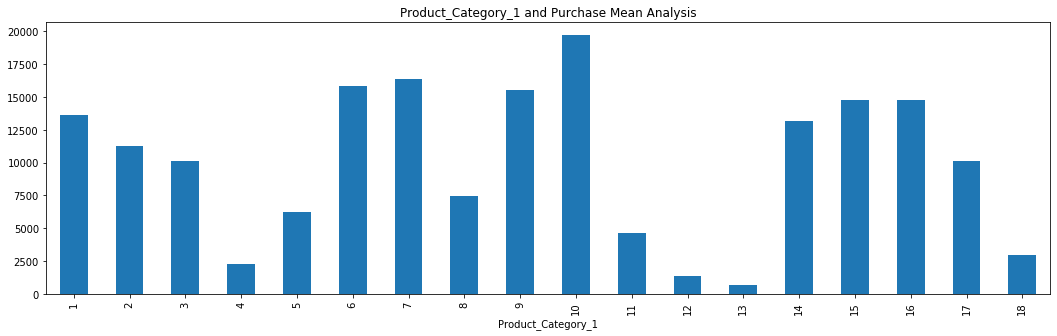

In [156]:
data.groupby('Product_Category_1').mean()['Purchase'].plot(kind='bar',figsize=(18,5))
plt.title("Product_Category_1 and Purchase Mean Analysis")
plt.show()

If you see the value spent on average for Product_Category_1 you see that although there were more products bought for categories 1,5,8 the average amount spent for those three is not the highest. It is interesting to see other categories appearing with high purchase values despite having low impact on sales number.

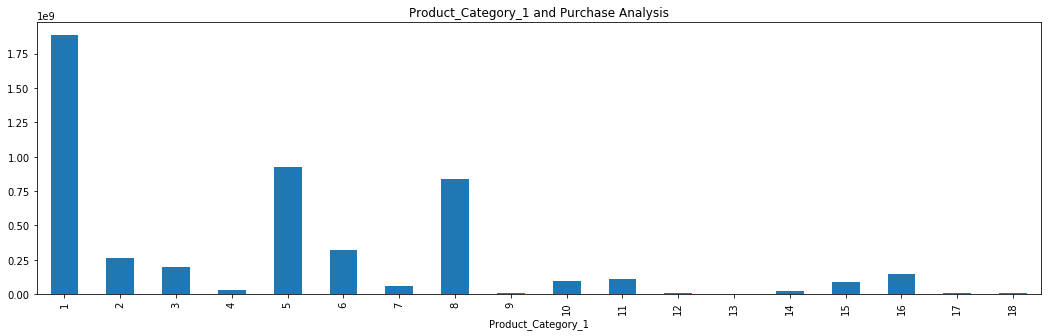

In [157]:
data.groupby('Product_Category_1').sum()['Purchase'].plot(kind='bar',figsize=(18,5))
plt.title("Product_Category_1 and Purchase Analysis")
plt.show()

The distribution that we saw for this predictor previously appears here. For example, those three products have the highest sum of sales since their were three most sold products.

### Product_Category_2

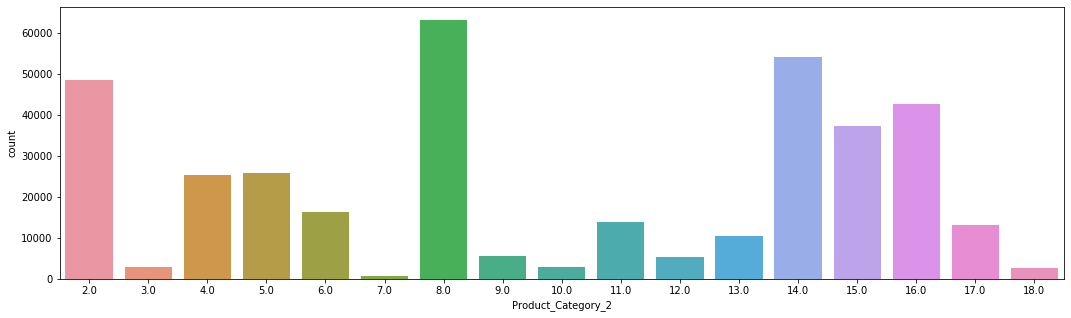

In [158]:
plt.figure(figsize=(18,5))
sns.countplot(data['Product_Category_2'])
plt.show()

### Product_Category_3

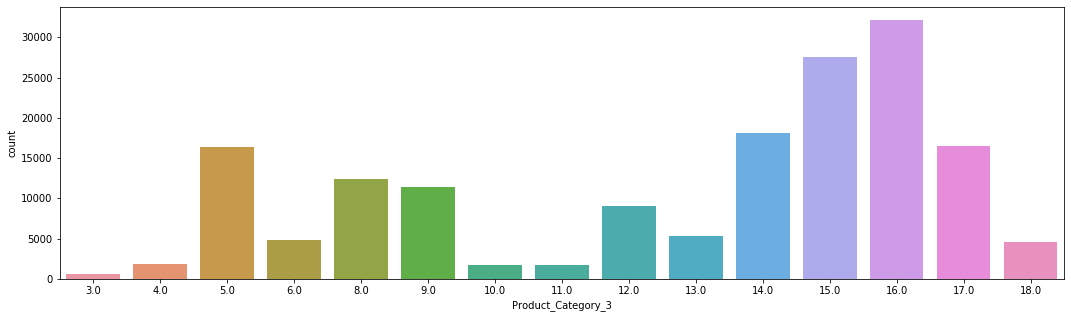

In [159]:
plt.figure(figsize=(18,5))
sns.countplot(data['Product_Category_3'])
plt.show()

In [160]:
data.corr()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
User_ID,1.000000,-0.023024,0.018732,0.003687,0.001471,0.004045,0.005389
Occupation,-0.023024,1.000000,0.024691,-0.008114,-0.000031,0.013452,0.021104
Marital_Status,0.018732,0.024691,1.000000,0.020546,0.015116,0.019452,0.000129
Product_Category_1,0.003687,-0.008114,0.020546,1.000000,0.540423,0.229490,-0.314125
Product_Category_2,0.001471,-0.000031,0.015116,0.540423,1.000000,0.543544,-0.209973
Product_Category_3,0.004045,0.013452,0.019452,0.229490,0.543544,1.000000,-0.022257
Purchase,0.005389,0.021104,0.000129,-0.314125,-0.209973,-0.022257,1.000000


## HeatMap

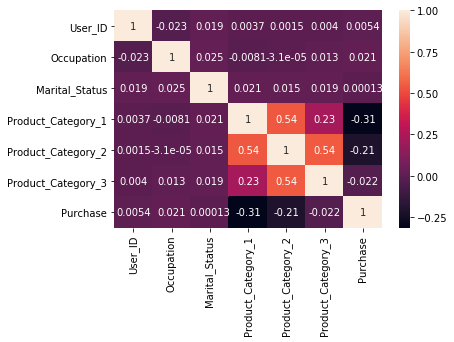

In [161]:
sns.heatmap(data.corr(),annot=True)
plt.show()

There is a some corellation between the product category groups.

In [162]:
data.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [163]:
df = data.copy()

In [164]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [165]:
# df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].replace(to_replace="4+",value="4")

In [166]:
#Dummy Variables:
df = pd.get_dummies(df, columns=['Stay_In_Current_City_Years'])

## Encoding the categorical variables

In [167]:
from sklearn.preprocessing import LabelEncoder
lr = LabelEncoder()

In [168]:
df['Gender'] = lr.fit_transform(df['Gender'])

In [169]:
df['Age'] = lr.fit_transform(df['Age'])

In [170]:
df['City_Category'] = lr.fit_transform(df['City_Category'])

In [171]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+
0,1000001,P00069042,0,0,10,0,0,3,NaN,NaN,8370,0,0,1,0,0
1,1000001,P00248942,0,0,10,0,0,1,6.0,14.0,15200,0,0,1,0,0
2,1000001,P00087842,0,0,10,0,0,12,NaN,NaN,1422,0,0,1,0,0
3,1000001,P00085442,0,0,10,0,0,12,14.0,NaN,1057,0,0,1,0,0
4,1000002,P00285442,1,6,16,2,0,8,NaN,NaN,7969,0,0,0,0,1


In [173]:
df['Product_Category_2'] =df['Product_Category_2'].fillna(0).astype('int64')
df['Product_Category_3'] =df['Product_Category_3'].fillna(0).astype('int64')

In [174]:
df.isnull().sum()

User_ID                          0
Product_ID                       0
Gender                           0
Age                              0
Occupation                       0
City_Category                    0
Marital_Status                   0
Product_Category_1               0
Product_Category_2               0
Product_Category_3               0
Purchase                         0
Stay_In_Current_City_Years_0     0
Stay_In_Current_City_Years_1     0
Stay_In_Current_City_Years_2     0
Stay_In_Current_City_Years_3     0
Stay_In_Current_City_Years_4+    0
dtype: int64

In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 16 columns):
User_ID                          537577 non-null int64
Product_ID                       537577 non-null object
Gender                           537577 non-null int32
Age                              537577 non-null int32
Occupation                       537577 non-null int64
City_Category                    537577 non-null int32
Marital_Status                   537577 non-null int64
Product_Category_1               537577 non-null int64
Product_Category_2               537577 non-null int64
Product_Category_3               537577 non-null int64
Purchase                         537577 non-null int64
Stay_In_Current_City_Years_0     537577 non-null uint8
Stay_In_Current_City_Years_1     537577 non-null uint8
Stay_In_Current_City_Years_2     537577 non-null uint8
Stay_In_Current_City_Years_3     537577 non-null uint8
Stay_In_Current_City_Years_4+    537577 non-null uint8
dtypes: 

## Dropping the irrelevant columns

In [176]:
df = df.drop(["User_ID","Product_ID"],axis=1)

## Splitting data into independent and dependent variables

In [179]:
X = df.drop("Purchase",axis=1)

In [180]:
y=df['Purchase']

In [181]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

## Modeling

### Linear Regression

In [182]:
from sklearn.linear_model import LinearRegression

In [183]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [184]:
lr.intercept_

9392.78408085134

In [185]:
lr.coef_

array([ 481.31865517,  107.64157841,    5.13000529,  336.95273272,
        -63.3778221 , -317.00345883,    7.9238667 ,  148.12973485,
        -32.78694504,   -1.66930455,   34.63808922,  -12.31969823,
         12.13785861])

In [186]:
y_pred = lr.predict(X_test)

In [187]:
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score

In [188]:
mean_absolute_error(y_test, y_pred)

3540.3993734221553

In [189]:
mean_squared_error(y_test, y_pred)

21342855.359792948

In [190]:
r2_score(y_test, y_pred)

0.13725207799200811

In [191]:
from math import sqrt
print("RMSE of Linear Regression Model is ",sqrt(mean_squared_error(y_test, y_pred)))

RMSE of Linear Regression Model is  4619.8328281219165


# DecisionTreeRegressor

In [192]:
from sklearn.tree import DecisionTreeRegressor

# create a regressor object 
regressor = DecisionTreeRegressor(random_state = 0)  

In [193]:
regressor.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=0, splitter='best')

In [194]:
dt_y_pred = regressor.predict(X_test)

In [195]:
mean_absolute_error(y_test, dt_y_pred)

2403.1409470088884

In [196]:
mean_squared_error(y_test, dt_y_pred)

11535194.335807195

In [197]:
r2_score(y_test, dt_y_pred)

0.5337097695969879

In [198]:
from math import sqrt
print("RMSE of Linear Regression Model is ",sqrt(mean_squared_error(y_test, dt_y_pred)))

RMSE of Linear Regression Model is  3396.3501491759052


# Random Forest Regressor

In [199]:
from sklearn.ensemble import RandomForestRegressor

# create a regressor object 
RFregressor = RandomForestRegressor(random_state = 0)  

In [200]:
RFregressor.fit(X_train, y_train)

C:\Users\Nantha\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [201]:
rf_y_pred = RFregressor.predict(X_test)

In [202]:
mean_absolute_error(y_test, rf_y_pred)

2270.784452116351

In [203]:
mean_squared_error(y_test, rf_y_pred)

9708236.383523637

In [204]:
r2_score(y_test, rf_y_pred)

0.6075613770954846

In [205]:
from math import sqrt
print("RMSE of Linear Regression Model is ",sqrt(mean_squared_error(y_test, rf_y_pred)))

RMSE of Linear Regression Model is  3115.8042915952915


# XGBoost Regressor

In [206]:
from xgboost.sklearn import XGBRegressor

In [207]:
xgb_reg = XGBRegressor(learning_rate=1.0, max_depth=6, min_child_weight=40, seed=0)

xgb_reg.fit(X_train, y_train)

C:\Users\Nantha\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[23:14:35] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=1.0, max_delta_step=0,
             max_depth=6, min_child_weight=40, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=0, silent=None,
             subsample=1, verbosity=1)

In [208]:
xgb_y_pred = xgb_reg.predict(X_test)

In [209]:
mean_absolute_error(y_test, xgb_y_pred)

2154.954637289423

In [210]:
mean_squared_error(y_test, xgb_y_pred)

8290522.888761112

In [211]:
r2_score(y_test, xgb_y_pred)

0.664869986978737

In [212]:
from math import sqrt
print("RMSE of Linear Regression Model is ",sqrt(mean_squared_error(y_test, xgb_y_pred)))

RMSE of Linear Regression Model is  2879.326811732408


The ML algorithm that perform the best was XGBoost Regressor Model with RMSE = 2879